<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/UpdatedMulti_Layer_Perceptron_(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:

# Load the dataset
file_path = '/content/AMZN.csv'
data = pd.read_csv(file_path)

# Select the 'Close' column and additional features
features = ['Close', 'Open', 'High', 'Low', 'Volume']
selected_data = data[features].values

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # 0 index for 'Close' price
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for MLP
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Define the MLP model
model = Sequential([
    Dense(256, input_dim=X_train_reshaped.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0475 - val_loss: 0.1122 - learning_rate: 0.0010
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - val_loss: 0.1308 - learning_rate: 0.0010
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0065 - val_loss: 0.1323 - learning_rate: 0.0010
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0043 - val_loss: 0.1266 - learning_rate: 0.0010
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0040 - val_loss: 0.1373 - learning_rate: 0.0010
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0034 - val_loss: 0.1454 - learning_rate: 0.0010
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - val_loss: 0.1463 - learning_rate: 2.0000e-04
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0028 - val_loss: 0.1510 - learning_rate: 2.0000e-04
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - val_loss: 0.1543 - learning_rate: 2.0000e-04


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4462
Test Loss: 3.737659454345703
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 92.90790205159045
MAE: 87.53207297797894
MAPE: 71.55918348080289


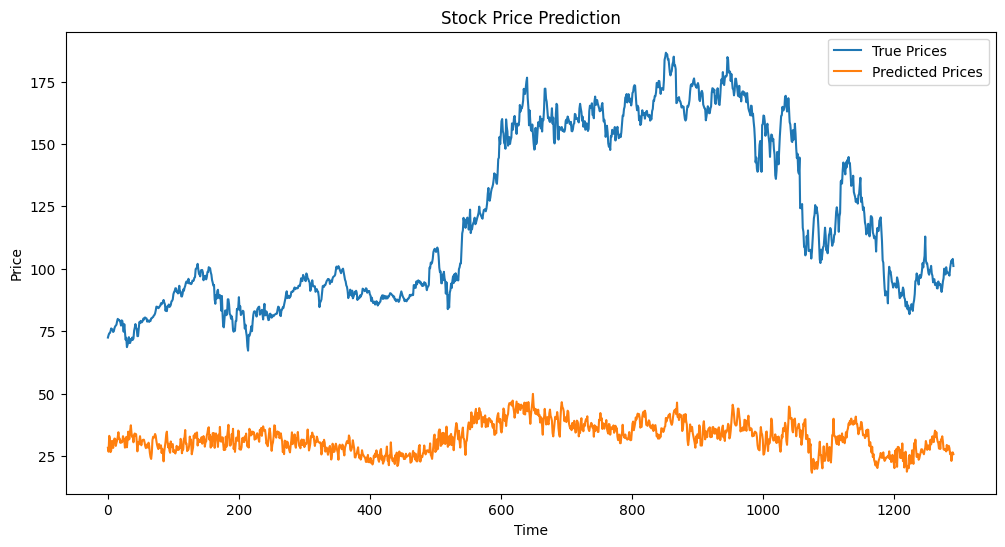

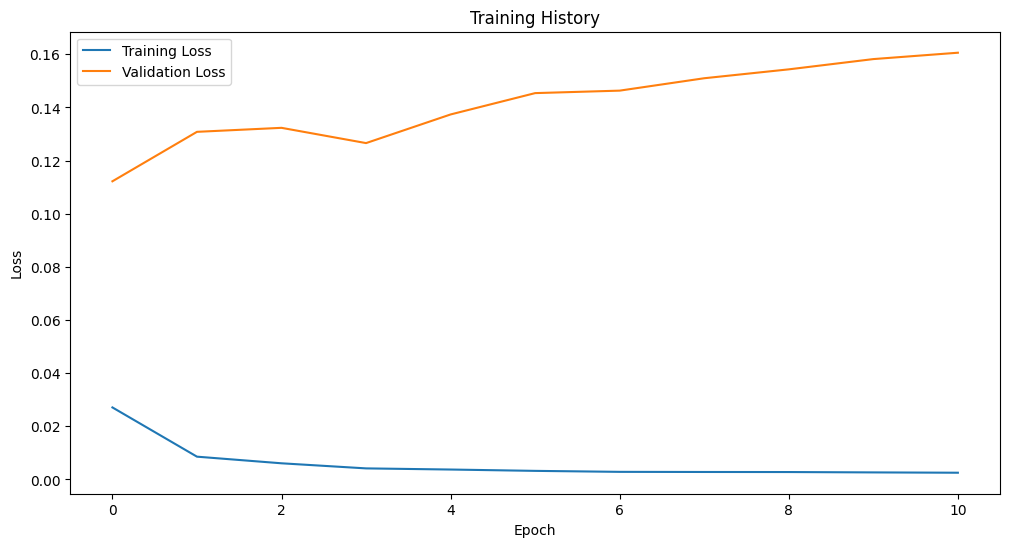

In [5]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_reshaped)

# Inverse transform the predictions and true values to get the original scale
predictions_temp = np.zeros((len(predictions), 5))
predictions_temp[:, 0] = predictions.flatten()
predictions_inverse = scaler.inverse_transform(predictions_temp)[:, 0]

y_test_temp = np.zeros((len(y_test), 5))
y_test_temp[:, 0] = y_test
y_test_inverse = scaler.inverse_transform(y_test_temp)[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the predictions against the true values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()